Contents

+ [Import the data](#import-data)

## Import the data <a class="anchor" id="import-data"></a>

In this chapter: from raw image, get to a usable form.
Apply ML algorithm at each step of the chapter and see results.
Transformations:
- color/gray
- scaled image
- segmentation
- blur
- denoise?

> find problem and dataset

- Problem with Keras and Jupyter Notebook: https://github.com/tensorflow/tensorflow/issues/9829  
The kernel keeps dying when importing Keras library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statistics import mean

from skimage import io
from skimage import feature
from skimage import transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def resize_images(list_images, shape = [500, 500]):
    list_resized = []
    for image in list_images:
        resized_image = skimage.transform.resize(image, shape)
        list_resized.append(resized_image)
    return list_resized


def get_hog(list_images):
    hog_features = []
    for image in list_images:
        hog_img = feature.hog(
        image,
        transform_sqrt = True,
        orientations = 8,
        pixels_per_cell = (16, 16),
        cells_per_block = (1, 1),
        feature_vector = True,
        visualize = False
        )
        hog_features.append(hog_img)
    return hog_features


def print_images(list_images):
    i = 1
    l = len(list_images)
    for image in list_images:
        plt.subplot(1, l, i)
        plt.imshow(image)
        i = i + 1
    plt.show()


def classify_images(df):
    
    df = df.assign(hog_features = get_hog(df['image']))
    
    
    accuracies = []
    
    for c in range(1, 5):
    
        print('Cross-validation number ' + str(c))
        train, test, y_train, y_test = train_test_split(df[['image', 'hog_features']], df['label'], test_size = 0.2, random_state = c)
    
        x_train = np.stack(train['hog_features'].values)
        x_test = np.stack(test['hog_features'].values)
    
        random_forest = RandomForestClassifier(n_estimators = 10, max_depth = 7, random_state = 0)
        random_forest.fit(x_train, y_train.values)
        predictions = random_forest.predict(x_test)
    
        accuracy = accuracy_score(predictions, y_test)
        accuracies.append(accuracy)
        
        print('Accuracy: ' + str(accuracy))
        i = 0
        l = len(test)
        for index, row in test.iterrows():
            plt.subplot(1, l, i+1)
            plt.imshow(row['image'])
            plt.title(str(predictions[i]))
            i = i + 1
        plt.show()
    
    return mean(accuracies)

In [2]:
from skimage.feature import shape_index

image = io.imread('./data/1.jpg')

#plt.imshow(image)

#s = shape_index(image)

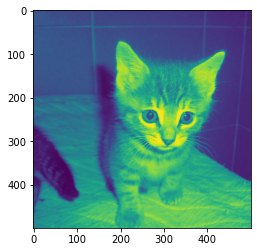

In [3]:
import skimage.feature as sf
from skimage.color import rgb2gray

image2 = rgb2gray(image)

plt.imshow(image2)

canny = sf.canny(image2)

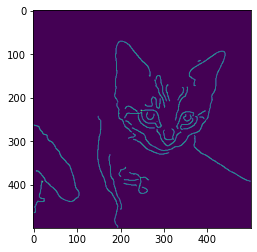

In [4]:
canny = sf.canny(image2, sigma = 3)
plt.imshow(canny)

In [28]:
hog_img = feature.hog(
        canny,
        transform_sqrt = True,
        orientations = 8,
        pixels_per_cell = (50, 50),
        cells_per_block = (3, 3),
        feature_vector = True,
        visualize = False
        )

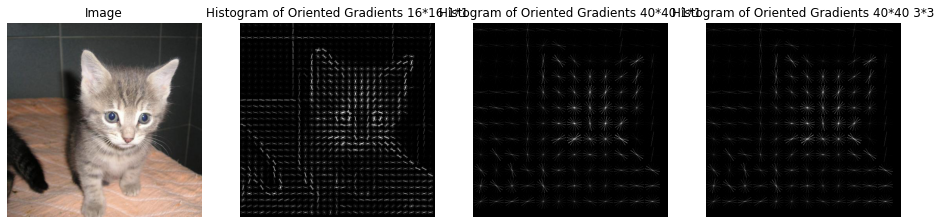

In [10]:
import skimage

fd, hog_image = feature.hog(image, orientations = 8, pixels_per_cell = (16, 16),
                    cells_per_block = (1, 1), visualize = True, multichannel = True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (16, 4), sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Image')

# Rescale histogram for better display
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range = (0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients 16*16 1*1')

fd, hog_image = feature.hog(image, orientations = 8, pixels_per_cell = (40, 40),
                    cells_per_block = (1, 1), visualize = True, multichannel = True)
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range = (0, 10))

ax3.axis('off')
ax3.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax3.set_title('Histogram of Oriented Gradients 40*40 1*1')

fd, hog_image = feature.hog(image, orientations = 8, pixels_per_cell = (40, 40),
                    cells_per_block = (3, 3), visualize = True, multichannel = True)
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range = (0, 10))

ax4.axis('off')
ax4.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax4.set_title('Histogram of Oriented Gradients 40*40 3*3')

plt.show()

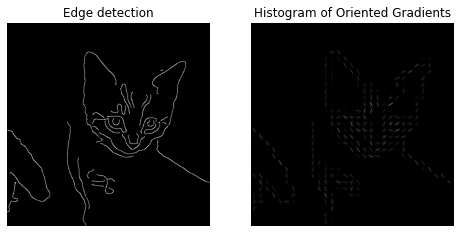

In [11]:
import skimage

fd, hog_image = feature.hog(canny, transform_sqrt = True, orientations = 8, pixels_per_cell = (16, 16),
                    cells_per_block = (1, 1), visualize = True, feature_vector = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(canny, cmap = plt.cm.gray)
ax1.set_title('Edge detection')

# Rescale histogram for better display
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range = (0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Cross-validation number 1
Accuracy: 0.25


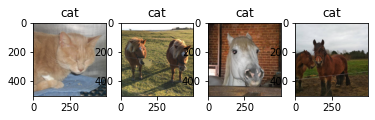

Cross-validation number 2
Accuracy: 0.25


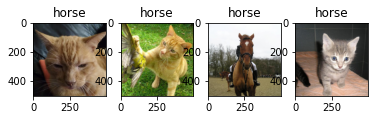

Cross-validation number 3
Accuracy: 0.25


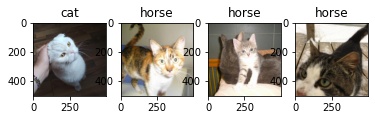

Cross-validation number 4
Accuracy: 0.75


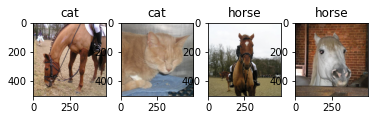

0.375


In [47]:
images = pd.read_csv('./2-images.csv')

read_images = []
for file in images['image_path']:
    read_images.append(io.imread(file))

# Normal images
images = images.assign(image = read_images)
print(classify_images(images))

In [ ]:
# Grey images
from skimage.color import rgb2gray

grey_images = []
for image in read_images:
    grey_image = rgb2gray(image)
    grey_images.append(grey_image)
images = images.assign(image = grey_images)
print(classify_images(images))

In [70]:
from sklearn import decomposition

def classify(random_state = 0):

    images = pd.read_csv('./2-images.csv')

    read_images = []
    for file in images['image_path']:
        read_images.append(io.imread(file))

    images = images.assign(image = read_images)

    hog_features = []
    for image in read_images:
        hog_image = feature.hog(image, orientations = 8, pixels_per_cell = (16, 16),
                                    cells_per_block = (1, 1), visualize = False, multichannel = True)
        hog_features.append(hog_image)

    images = images.assign(hog_features = hog_features)
    
    hog_pca = decomposition.PCA()
    hog_pca.fit(hog_features)
    images = images.assign(hog_pca = hog_pca)

    train, test, y_train, y_test = train_test_split(images[['image', 'hog_pca']],
                                                    images['label'], test_size = 0.2, random_state = random_state)

    x_train = np.stack(train['hog_pca'].values)
    x_test = np.stack(test['hog_pca'].values)

    random_forest = RandomForestClassifier(n_estimators = 10, max_depth = 7, random_state = 0)
    random_forest.fit(x_train, y_train.values)
    predictions = random_forest.predict(x_test)

    accuracy = accuracy_score(predictions, y_test)

    #i = 0
    #l = len(test)
    #for index, row in test.iterrows():
    #    plt.subplot(1, l, i+1)
    #    plt.imshow(row['image'])
    #    plt.title(str(predictions[i]))
    #    i = i + 1
    #plt.show()

    print(accuracy)

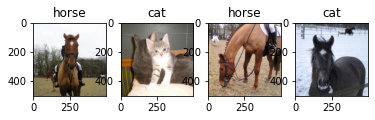

0.75


In [65]:
#classify(0)

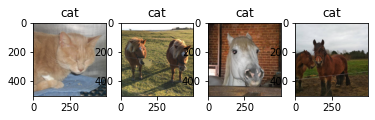

0.25


In [66]:
#classify(1)

In [68]:
#classify(2)
#classify(3)
#classify(4)
#classify(5)
#classify(6)
#classify(7)
#classify(8)
#classify(9)
#classify(10)

0.5
0.5
0.5
0.25
0.5
0.75
0.25
0.5
0.25


In [ ]:
def print_images(list_images):
    plt.figure(figsize = [12, 5])
    i = 1
    l = len(list_images)
    for image in list_images:
        plt.subplot(1, l, i)
        plt.imshow(image)
        i = i + 1
    plt.show()
    
#print_images(train['image'])
#print_images(train['hog_features'])